# Ejercicio 4

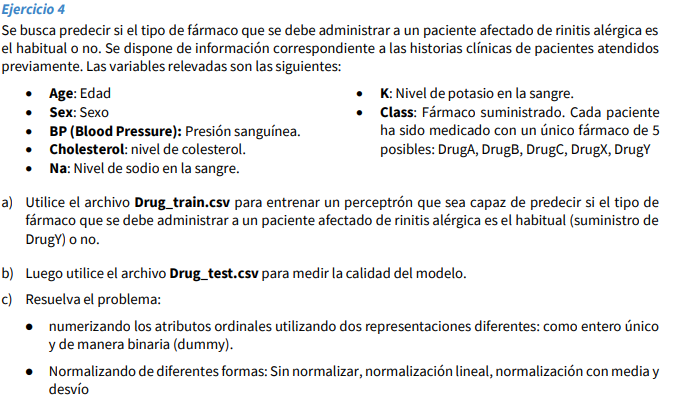

In [133]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection,preprocessing
from ClassPerceptron import Perceptron
from matplotlib import pylab as plt

In [135]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos

nombre_archivo = DATOS_DIR + 'Drug5.csv' # archivo de drogas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
#print(df)
display(df)

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX


In [136]:
#Primero numerizamos el sexo, BP y el cholesterol

reemplazo = {
    "Sex": {"M":0, "F":1},
    "BP": {"HIGH":2, "NORMAL":1, "LOW":0},
    "Cholesterol": {"NORMAL":0, "HIGH":1}
}

df.replace(reemplazo, inplace=True)
df

C:\Users\ivanb\AppData\Local\Temp\ipykernel_18952\1430656349.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(reemplazo, inplace=True)


,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,1,2,1,0.792535,0.031258,drugY
1,47,0,0,1,0.739309,0.056468,drugC
2,47,0,0,1,0.697269,0.068944,drugC
3,28,1,1,1,0.563682,0.072289,drugX
4,61,1,0,1,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,1,0,1,0.848774,0.073380,drugC
196,16,0,0,1,0.743021,0.061886,drugC
197,52,0,1,1,0.549945,0.055581,drugX
198,23,0,1,0,0.784520,0.055959,drugX


Primero se definen las entradas X y las salidas esperadas T

In [137]:
X = np.array(df.iloc[:,:-1])
Y = np.array((df['Drug'] ==  'drugY') * 1)

In [138]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state=42)

In [139]:
normalizar = 1
if (normalizar):
    #--- Normalización lineal entre 0 y 1 ---
    normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    #normalizador= preprocessing.StandardScaler()
    
    x_train = normalizador.fit_transform(x_train)
    #Se utiliza transform para tener los mismos datos de normalizacion (maximos y minimos) que los de entrenamiento
    x_test = normalizador.transform(x_test)

In [140]:
ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn.fit(x_train, y_train)

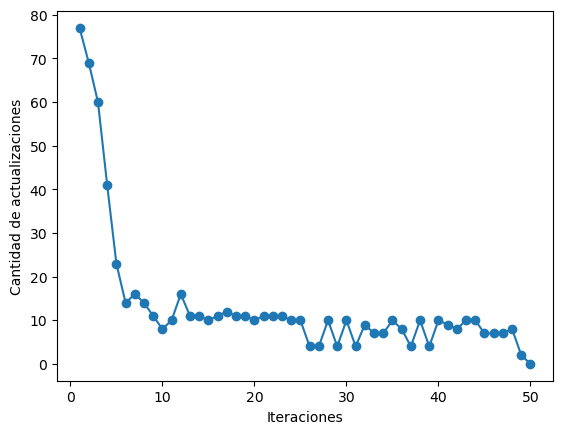

In [141]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
#ppn.errors_ indica la cantidad de errores cometidos en el entrenamiento
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [142]:
#Medimos la calidad del modelo
Y_pred = ppn.predict(x_test)

aciertos = sum(Y_pred == y_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_pred == y_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/x_test.shape[0]))


aciertos =  60
% de aciertos = 100.00 %
